In [71]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from function import datos

In [72]:
df_train = pd.read_csv("../Data/train.csv")
df_train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [73]:
df_train.shape

(8693, 14)

In [ ]:
"""
PassengerId- Una identificación única para cada pasajero. Cada Id toma la forma gggg_ppdonde ggggindica un grupo con el que viaja el pasajero y ppes su número dentro del grupo. Las personas de un grupo suelen ser miembros de la familia, pero no siempre.
HomePlanet- El planeta del que partió el pasajero, normalmente su planeta de residencia permanente.
CryoSleep- Indica si el pasajero optó por ser puesto en animación suspendida durante la duración del viaje. Los pasajeros en criosueño están confinados en sus cabinas.
Cabin- El número de cabina donde se aloja el pasajero. Toma la forma deck/num/side, donde sidepuede ser tanto Ppara Babor como Spara Estribor .
Destination- El planeta al que desembarcará el pasajero.
Age- La edad del pasajero.
VIP- Si el pasajero ha pagado por un servicio VIP especial durante el viaje.
RoomService, FoodCourt, ShoppingMall, Spa, VRDeck- Monto que el pasajero ha facturado por cada una de las muchas comodidades de lujo del Spaceship Titanic .
Name- El nombre y apellidos del pasajero.
Transported- Si el pasajero fue transportado a otra dimensión. Este es el objetivo, la columna que intentas predecir.
"""

In [74]:
datos.datos_columna(df_train)

PassengerId 8693 ['0001_01' '0002_01' '0003_01' ... '9279_01' '9280_01' '9280_02'] 

HomePlanet 4 ['Europa' 'Earth' 'Mars' nan] 

CryoSleep 3 [False True nan] 

Cabin 6561 ['B/0/P' 'F/0/S' 'A/0/S' ... 'G/1499/S' 'G/1500/S' 'E/608/S'] 

Destination 4 ['TRAPPIST-1e' 'PSO J318.5-22' '55 Cancri e' nan] 

Age 81 [39. 24. 58. 33. 16. 44. 26. 28. 35. 14. 34. 45. 32. 48. 31. 27.  0.  1.
 49. 29. 10.  7. 21. 62. 15. 43. 47.  2. 20. 23. 30. 17. 55.  4. 19. 56.
 nan 25. 38. 36. 22. 18. 42. 37. 13.  8. 40.  3. 54.  9.  6. 64. 67. 61.
 50. 41. 57. 11. 52. 51. 46. 60. 63. 59.  5. 79. 68. 74. 12. 53. 65. 71.
 75. 70. 76. 78. 73. 66. 69. 72. 77.] 

VIP 3 [False True nan] 

RoomService 1274 [   0.  109.   43. ... 1569. 8586.  745.] 

FoodCourt 1508 [   0.    9. 3576. ... 3208. 6819. 4688.] 

ShoppingMall 1116 [   0.   25.  371. ... 1085.  510. 1872.] 

Spa 1328 [   0.  549. 6715. ... 2868. 1107. 1643.] 

VRDeck 1307 [   0.   44.   49. ... 1164.  971. 3235.] 

Name 8474 ['Maham Ofracculy' 'Juanna Vines'

In [75]:
df_train.isna().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

Reemplazando valores

In [76]:
# Reemplazar texto por valores numericos
df_train = datos.modificar_texto(df_train, 'HomePlanet', {'Europa': 1, 'Earth': 2, 'Mars':3})
df_train = datos.modificar_texto(df_train, 'Destination', {'TRAPPIST-1e': 1, 'PSO J318.5-22': 2, '55 Cancri e':3})

In [77]:
# Reemplazando valores bool
df_train = datos.modificar_bool(df_train, ['CryoSleep', 'VIP', 'Transported'])

In [78]:
# reemplazando valores NaN
df_train[['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']] = df_train[['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']].fillna(0)

In [79]:
# Sumamos el total de gastos
df_train['TotalGastos'] = df_train['RoomService'] + df_train['FoodCourt'] + df_train['ShoppingMall'] + df_train['Spa'] + df_train['VRDeck']
df_train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,TotalGastos
0,0001_01,1.0,0.0,B/0/P,1.0,39.0,0.0,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,0,0.0
1,0002_01,2.0,0.0,F/0/S,1.0,24.0,0.0,109.0,9.0,25.0,549.0,44.0,Juanna Vines,1,736.0
2,0003_01,1.0,0.0,A/0/S,1.0,58.0,1.0,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,0,10383.0
3,0003_02,1.0,0.0,A/0/S,1.0,33.0,0.0,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,0,5176.0
4,0004_01,2.0,0.0,F/1/S,1.0,16.0,0.0,303.0,70.0,151.0,565.0,2.0,Willy Santantines,1,1091.0


In [ ]:
# REVISIONES

# df_train[(df_train['TotalGastos'] == 0) & (df_train['CryoSleep'].isnull() == True)]
# df_train[(df_train['TotalGastos'] > 0) & (df_train['CryoSleep'].isnull() == True)]
# df_train[df_train['CryoSleep'].isnull() == True]
# df_train[(df_train['TotalGastos'] == 0) & (df_train['VIP'].isnull() == True)]
# df_train[(df_train['TotalGastos'] > 0) & (df_train['VIP'].isnull() == True)]

# df_train[(df_train['TotalGastos'] > 0) & (df_train['VIP'] == 0)]

df_train[(df_train['VIP'] == 1)]


In [80]:
import numpy as np

# Reemplazamos los NaN por 1, para la columna CryoSleep. La columna TotalGastosdebe ser 0.
df_train["CryoSleep"] = np.where((df_train["TotalGastos"] == 0) & (df_train["CryoSleep"].isnull() == True), 1, df_train["CryoSleep"])

In [81]:
# Reemplazamos los NaN por 0, para la columna CryoSleep. La columna TotalGastosdebe sea mayor a 0.
df_train["CryoSleep"] = np.where((df_train["TotalGastos"] > 0) & (df_train["CryoSleep"].isnull() == True), 0, df_train["CryoSleep"])

In [100]:
# Reemplazmos los NaN de la edad por la media.
df_train['Age'] = df_train['Age'].fillna(df_train['Age'].mean().astype(int))

In [114]:
media_gatos = df_train[(df_train["VIP"] == 1)]["TotalGastos"].mean().astype(int)
media_gatos

# Reemplazamos los NaN por 1, para la columna VIP. La columna TotalGastos debe ser mayor-igual a la media.
df_train["VIP"] = np.where((df_train["TotalGastos"] >= media_gatos), 1, df_train["VIP"])


In [116]:
# Reemplazamos los NaN por 0, para la columna VIP. 
df_train["VIP"] = np.where((df_train["VIP"].isnull() == True), 0, df_train["VIP"])

In [117]:
df_train.isna().sum()

PassengerId       0
HomePlanet        0
CryoSleep         0
Cabin           199
Destination       0
Age               0
VIP               0
RoomService       0
FoodCourt         0
ShoppingMall      0
Spa               0
VRDeck            0
Name            200
Transported       0
TotalGastos       0
dtype: int64

In [118]:
# Dividiendo columna Cabina
df_cabin = datos.divir_columna(df_train, 'Cabin', ['Deck', 'Num', 'Side'])
df_cabin

,Deck,Num,Side
0,B,0,P
1,F,0,S
2,A,0,S
3,A,0,S
4,F,1,S
...,...,...,...
8688,A,98,P
8689,G,1499,S
8690,G,1500,S
8691,E,608,S


In [119]:
datos.datos_columna(df_cabin)

Deck 9 ['B' 'F' 'A' 'G' nan 'E' 'D' 'C' 'T'] 

Num 1818 ['0' '1' '2' ... '1892' '1893' '1894'] 

Side 3 ['P' 'S' nan] 



In [120]:
# Juntando DataFrames
df_train = pd.concat([df_train, df_cabin], axis = 1)

In [121]:
# Convertir variables categóricas en representaciones numéricas
df_train = pd.get_dummies(df_train, columns=['Deck', 'Side'], dtype = int)

In [122]:
# Borramos columnas que no se utilizara
df_train.drop(columns=['PassengerId', 'Name', 'Cabin', 'Num', 'TotalGastos'], inplace= True)
# df_train.drop(columns=['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck'], inplace= True)

In [123]:
df_train.isna().sum()

HomePlanet      0
CryoSleep       0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Transported     0
Deck_A          0
Deck_B          0
Deck_C          0
Deck_D          0
Deck_E          0
Deck_F          0
Deck_G          0
Deck_T          0
Side_P          0
Side_S          0
dtype: int64

In [124]:
val_columnas = ['HomePlanet', 'CryoSleep','Destination','Age','VIP','RoomService','FoodCourt','ShoppingMall','Spa','VRDeck','Transported','Deck_A','Deck_B','Deck_C','Deck_D','Deck_E','Deck_F','Deck_G','Deck_T','Side_P','Side_S']

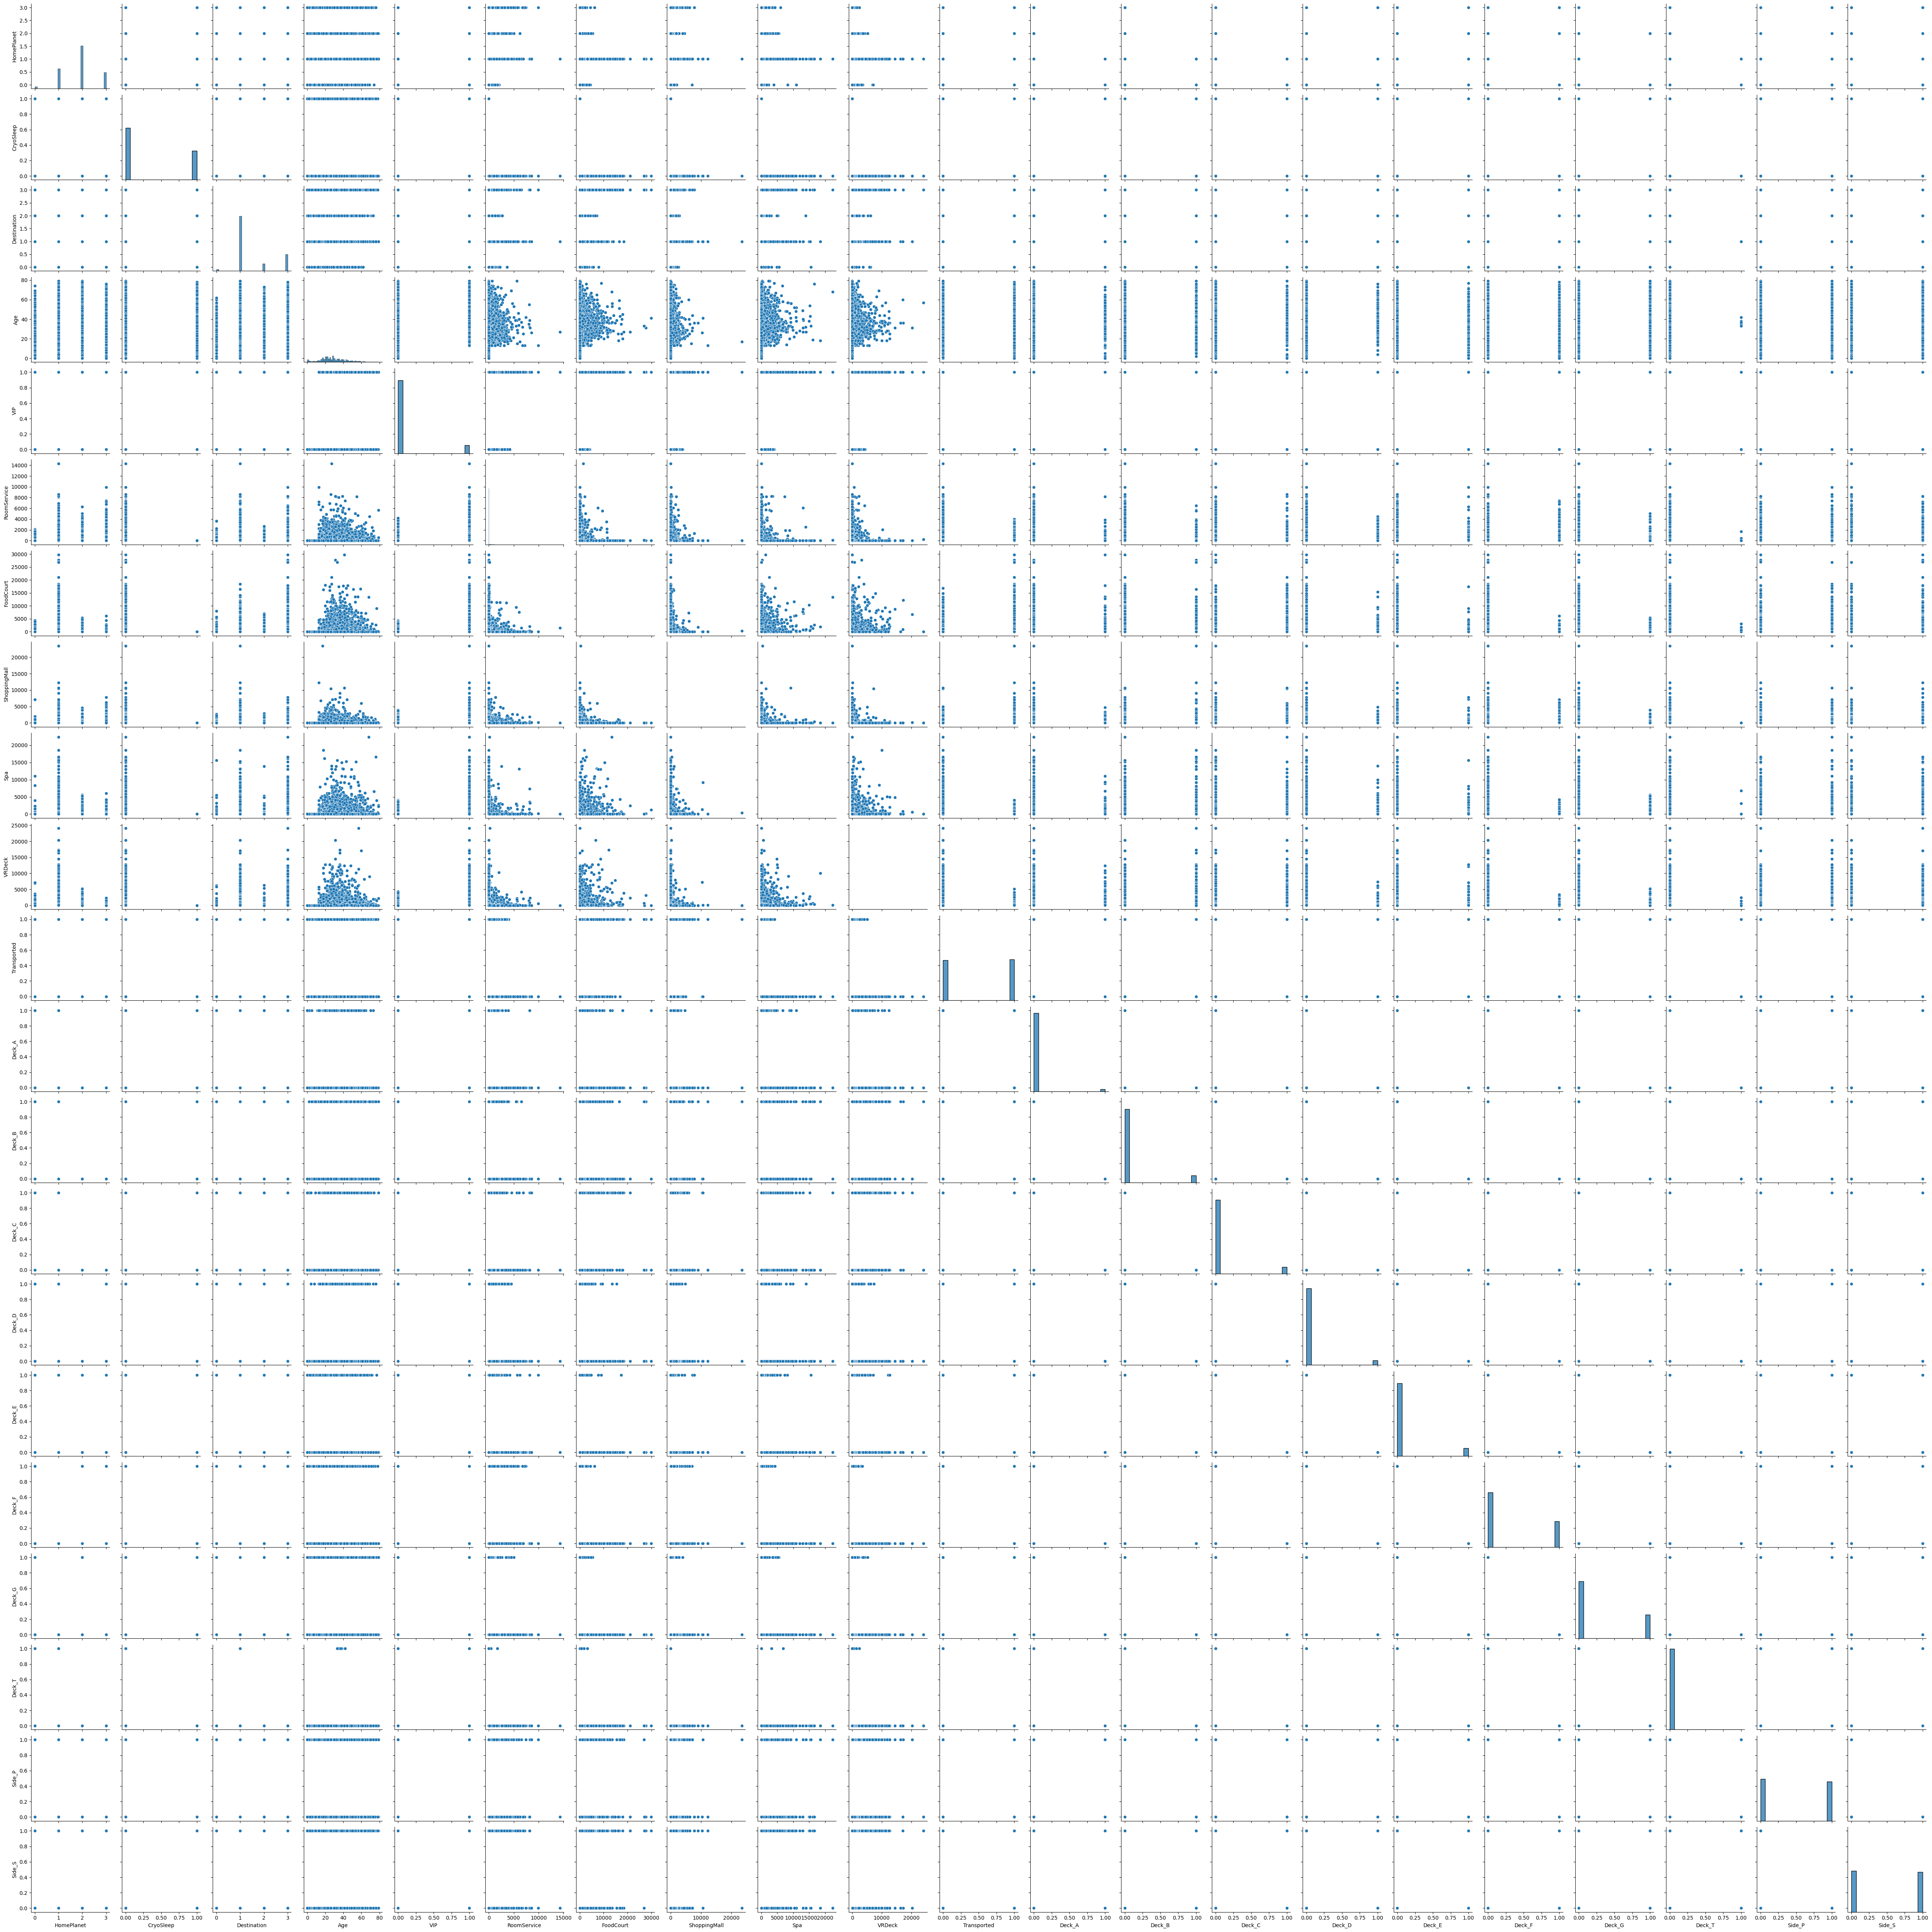

In [125]:
# Pairplot for selected features
val_columnas = ['HomePlanet', 'CryoSleep','Destination','Age','VIP','RoomService','FoodCourt','ShoppingMall','Spa','VRDeck','Transported','Deck_A','Deck_B','Deck_C','Deck_D','Deck_E','Deck_F','Deck_G','Deck_T','Side_P','Side_S']
selected_features = val_columnas
sns.pairplot(df_train[selected_features])
plt.show()

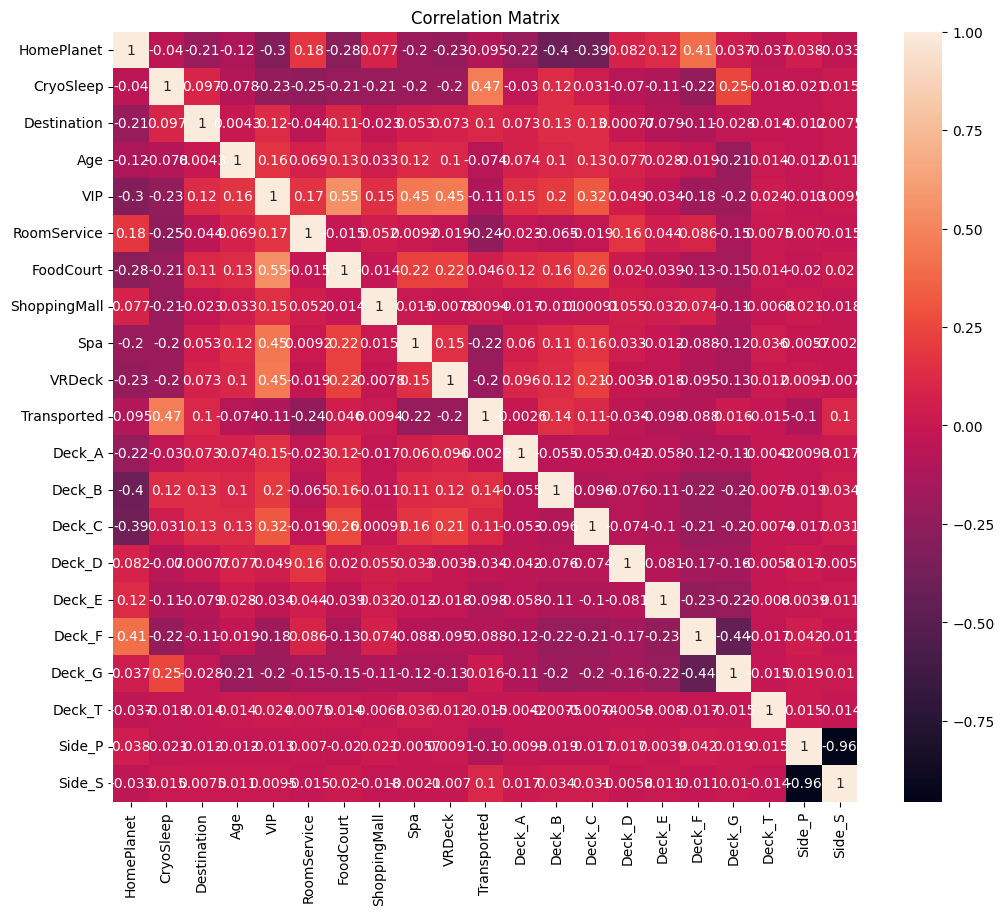

In [126]:
# Calculate correlation matrix
selected_features = val_columnas
correlation_matrix = df_train[selected_features].corr()

# Plot heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix')
plt.show()

In [127]:
print(df_train.columns)
print(len(df_train.columns))

Index(['HomePlanet', 'CryoSleep', 'Destination', 'Age', 'VIP', 'RoomService',
       'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Transported', 'Deck_A',
       'Deck_B', 'Deck_C', 'Deck_D', 'Deck_E', 'Deck_F', 'Deck_G', 'Deck_T',
       'Side_P', 'Side_S'],
      dtype='object')
21


In [128]:
df_train

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,...,Deck_A,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T,Side_P,Side_S
0,1.0,0.0,1.0,39.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,1,0,0,0,0,0,0,1,0
1,2.0,0.0,1.0,24.0,0.0,109.0,9.0,25.0,549.0,44.0,...,0,0,0,0,0,1,0,0,0,1
2,1.0,0.0,1.0,58.0,1.0,43.0,3576.0,0.0,6715.0,49.0,...,1,0,0,0,0,0,0,0,0,1
3,1.0,0.0,1.0,33.0,1.0,0.0,1283.0,371.0,3329.0,193.0,...,1,0,0,0,0,0,0,0,0,1
4,2.0,0.0,1.0,16.0,0.0,303.0,70.0,151.0,565.0,2.0,...,0,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,1.0,0.0,3.0,41.0,1.0,0.0,6819.0,0.0,1643.0,74.0,...,1,0,0,0,0,0,0,0,1,0
8689,2.0,1.0,2.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,1,0,0,1
8690,2.0,0.0,1.0,26.0,0.0,0.0,0.0,1872.0,1.0,0.0,...,0,0,0,0,0,0,1,0,0,1
8691,1.0,0.0,3.0,32.0,1.0,0.0,1049.0,0.0,353.0,3235.0,...,0,0,0,0,1,0,0,0,0,1


In [129]:
X = df_train.drop('Transported', axis=1)
y = df_train['Transported']

print(X.shape, y.shape)

(8693, 20) (8693,)


In [130]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=30)

Index(['HomePlanet', 'CryoSleep', 'Destination', 'Age', 'VIP', 'RoomService',
       'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Deck_A', 'Deck_B',
       'Deck_C', 'Deck_D', 'Deck_E', 'Deck_F', 'Deck_G', 'Deck_T', 'Side_P',
       'Side_S'],
      dtype='object') [4.20718604e-02 1.07966258e-01 3.09687089e-02 1.71041212e-01
 8.23954475e-03 1.15992005e-01 1.04728155e-01 9.28607359e-02
 1.13349697e-01 1.10479736e-01 2.65329051e-03 8.43724153e-03
 8.78671025e-03 4.86251099e-03 1.44792481e-02 2.00713798e-02
 2.01133774e-02 4.71046212e-05 1.11880967e-02 1.16631272e-02]


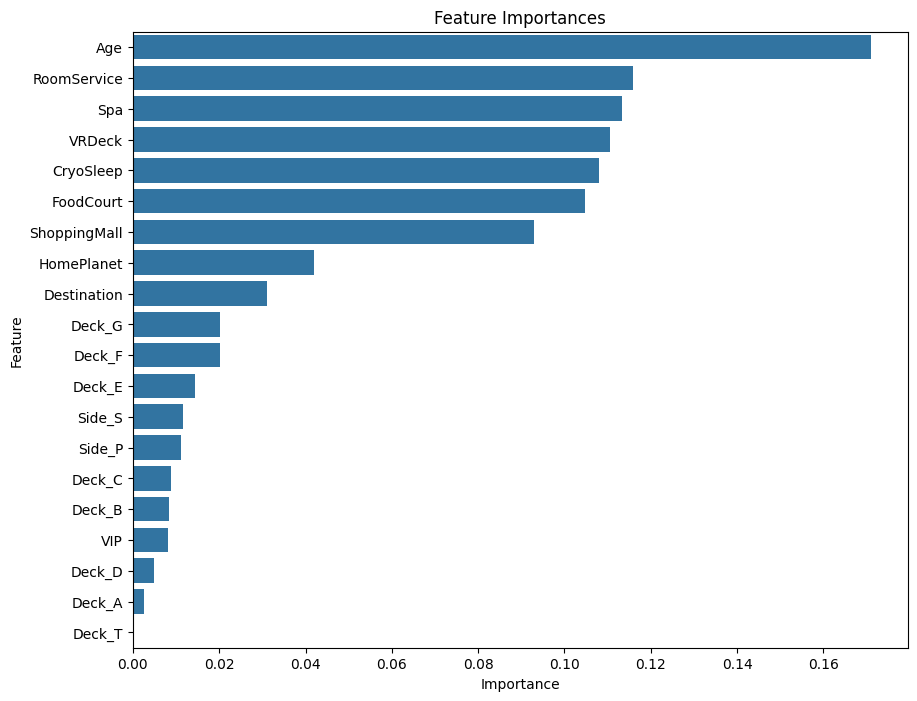

In [131]:
from sklearn.ensemble import RandomForestClassifier
# Initialize Random Forest classifier
rf = RandomForestClassifier()

# Fit the model
rf.fit(X_train, y_train)

# Get feature importances
feature_importances = rf.feature_importances_
print(X.columns,feature_importances)

# Create a DataFrame to store feature importances
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sort features based on importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

In [132]:
features_selected = list(feature_importance_df[feature_importance_df['Importance']>0.01]['Feature'])
features_selected

['Age',
 'RoomService',
 'Spa',
 'VRDeck',
 'CryoSleep',
 'FoodCourt',
 'ShoppingMall',
 'HomePlanet',
 'Destination',
 'Deck_G',
 'Deck_F',
 'Deck_E',
 'Side_S',
 'Side_P']

In [133]:
X_train = X_train[features_selected]
X_test = X_test[features_selected]
print(X_train.shape)
print(X_test.shape)

(7823, 14)
(870, 14)


In [134]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7823 entries, 1950 to 5925
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           7823 non-null   float64
 1   RoomService   7823 non-null   float64
 2   Spa           7823 non-null   float64
 3   VRDeck        7823 non-null   float64
 4   CryoSleep     7823 non-null   float64
 5   FoodCourt     7823 non-null   float64
 6   ShoppingMall  7823 non-null   float64
 7   HomePlanet    7823 non-null   float64
 8   Destination   7823 non-null   float64
 9   Deck_G        7823 non-null   int32  
 10  Deck_F        7823 non-null   int32  
 11  Deck_E        7823 non-null   int32  
 12  Side_S        7823 non-null   int32  
 13  Side_P        7823 non-null   int32  
dtypes: float64(9), int32(5)
memory usage: 764.0 KB


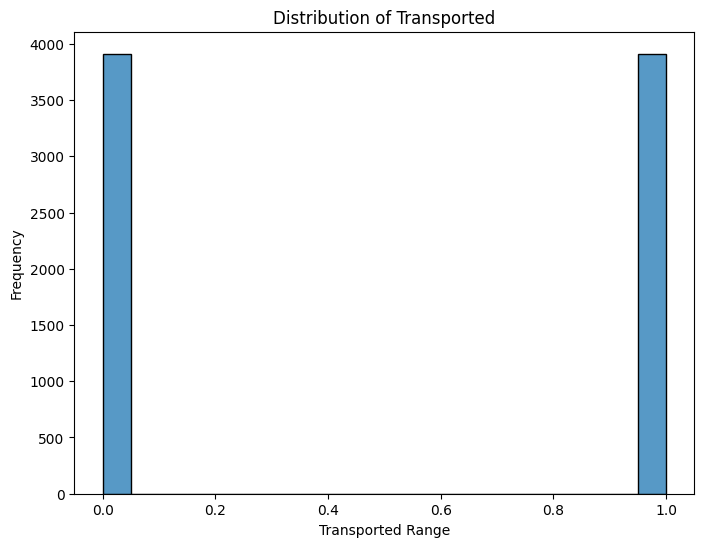

In [135]:
# Visualize the distribution of the target variable (price range)
plt.figure(figsize=(8, 6))
sns.histplot(y_train, bins=20)
plt.title('Distribution of Transported')
plt.xlabel('Transported Range')
plt.ylabel('Frequency')
plt.show()

In [136]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize Random Forest classifier
rf_classifier = RandomForestClassifier()

# Train the classifier
rf_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred = rf_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.8

Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.85      0.80       404
           1       0.86      0.75      0.80       466

    accuracy                           0.80       870
   macro avg       0.80      0.80      0.80       870
weighted avg       0.81      0.80      0.80       870


Confusion Matrix:
[[345  59]
 [115 351]]


In [137]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

models = {
    'Random Forest': RandomForestClassifier(),
    'Support Vector Machine': SVC(),
    'Gradient Boosting': GradientBoostingClassifier()
}
# Set up cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation and compare models
results = {}
for name, model in models.items():
    cv_scores = cross_val_score(model, X, y, cv = kf, scoring='accuracy')
    results[name] = cv_scores

# Print results
for name, scores in results.items():
    print(f"Model: {name}")
    print(f"Cross-validation Scores: {scores}")
    print(f"Mean Accuracy: {scores.mean()}")
    print(f"Standard Deviation: {scores.std()}")
    print()

Model: Random Forest
Cross-validation Scores: [0.7826337  0.79585969 0.78895917 0.79286536 0.79631761]
Mean Accuracy: 0.7913271055743449
Standard Deviation: 0.005079332697663546

Model: Support Vector Machine
Cross-validation Scores: [0.77400805 0.78780909 0.78838413 0.78078251 0.80494822]
Mean Accuracy: 0.7871863980132228
Standard Deviation: 0.010314874007535797

Model: Gradient Boosting
Cross-validation Scores: [0.78205865 0.79643473 0.80276021 0.80149597 0.8164557 ]
Mean Accuracy: 0.7998410525208263
Standard Deviation: 0.011091648260836987



In [138]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize Random Forest classifier
rf_classifier = RandomForestClassifier()

# Train the classifier
rf_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred = rf_classifier.predict(X_test)

In [139]:
import joblib
# Save the trained model to a file
joblib.dump(rf_classifier, 'random_forest_model.pkl')

['random_forest_model.pkl']

In [140]:
# Load the saved Random Forest model from file
loaded_model = joblib.load('random_forest_model.pkl')

In [143]:
# Predict on the test set
y_pred = rf_classifier.predict(X_test)
print(y_pred[:14])
y_pred = loaded_model.predict(X_test)
print(y_pred[:14])

[0 1 1 0 1 0 0 1 0 0 1 1 1 1]
[0 1 1 0 1 0 0 1 0 0 1 1 1 1]


In [145]:
raw_test = X_test.iloc[0,:]
print(X_test.iloc[0,:])
raw_test = np.array(raw_test)
print(raw_test)
raw_test = raw_test.reshape([1,14])
print(raw_test)

y_pred = rf_classifier.predict(raw_test)
print(y_pred)

Age              28.0
RoomService     311.0
Spa             232.0
VRDeck            0.0
CryoSleep         0.0
FoodCourt         0.0
ShoppingMall    745.0
HomePlanet        3.0
Destination       1.0
Deck_G            0.0
Deck_F            1.0
Deck_E            0.0
Side_S            0.0
Side_P            1.0
Name: 2320, dtype: float64
[ 28. 311. 232.   0.   0.   0. 745.   3.   1.   0.   1.   0.   0.   1.]
[[ 28. 311. 232.   0.   0.   0. 745.   3.   1.   0.   1.   0.   0.   1.]]
[0]


C:\Users\CRISTOFER\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
